# Amazon Review Data

In [8]:
import gzip
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

Data downloaded from http://jmcauley.ucsd.edu/data/amazon/links.html

R. He, J. McAuley. Modeling the visual evolution of fashion trends with one-class collaborative filtering. WWW, 2016


J. McAuley, C. Targett, J. Shi, A. van den Hengel. Image-based recommendations on styles and substitutes. SIGIR, 2015

# Read data into pandas dataframe

### Set paths

In [13]:
path = '/mnt/d/Documents/Studies/DataScience_MS/Courses/W266_Natural_Language_Processing/Project/w266-final-project/data/raw/'

path_instant_videos = path + 'reviews_Amazon_Instant_Video.json.gz'
path_toys_and_games = path + 'reviews_Toys_and_Games.json.gz'

### Parsing function

In [14]:
def parse(path): 
    g = gzip.open(path, 'rb') 
    for l in g: 
        yield eval(l) 

### Function to read into dataframe

In [15]:
def getDF(path): 
    i = 0 
    df = {} 
    for d in parse(path): 
        df[i] = d 
        i += 1
    return pd.DataFrame.from_dict(df, orient='index').rename(columns={'reviewTime': 'reviewDate'})

### Read into dataframe

#### Read Instant Video reviews into dataframe

In [16]:
df_instant_videos = getDF(path_instant_videos)
df_instant_videos.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewDate
0,A1EE2E3N7PW666,B000GFDAUG,"Aaron L. Allen ""Orgazmo1009""","[0, 0]",CA Lewsi' review should be removed. he's revie...,5.0,Stupid,1202256000,"02 6, 2008"
1,AGZ8SM1BGK3CK,B000GFDAUG,Mind's Clay,"[1, 1]",I truly love the humor of South Park. It's soc...,5.0,"""More Moist Than Should Be"" Humor",1198195200,"12 21, 2007"
2,A2VHZ21245KBT7,B000GIOPK2,"202_d ""202_d""","[0, 0]",This is a cartoon series pitting eight cartoon...,4.0,"Overall, really like the series.",1215388800,"07 7, 2008"
3,ACX8YW2D5EGP6,B000GIOPK2,"Alexandra Stephens ""dreamgirl0922""","[11, 13]",Yeah drawn together is great when it comes to ...,4.0,Crude cartoon humor...Check,1185840000,"07 31, 2007"
4,A9RNMO9MUSMTJ,B000GIOPK2,Andre Villemaire,"[0, 2]",Seems like today's generation is getting reven...,2.0,not bad...,1281052800,"08 6, 2010"


#### Read Toys and Games reviews into dataframe

In [17]:
df_toys_and_games = getDF(path_toys_and_games)
df_toys_and_games.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewDate
0,AMEVO2LY6VEJA,0000191639,Nicole Soeder,"[0, 0]","Great product, thank you! Our son loved the pu...",5.0,Puzzles,1388016000,"12 26, 2013"
1,A3C9CSW3TJITGT,0005069491,Renee,"[0, 0]",I love these felt nursery rhyme characters and...,4.0,Charming characters but busy work required,1377561600,"08 27, 2013"
2,A31POTIYCKSZ9G,0076561046,So CA Teacher,"[0, 0]",I see no directions for its use. Therefore I h...,3.0,No directions for use...,1404864000,"07 9, 2014"
3,A2GGHHME9B6W4O,0131358936,Dalilah G.,"[0, 0]",This is a great tool for any teacher using the...,5.0,Great CD-ROM,1382400000,"10 22, 2013"
4,A1FSLDH43ORWZP,0133642984,Dayna English,"[0, 0]",Although not as streamlined as the Algebra I m...,5.0,Algebra II -- presentation materials,1374278400,"07 20, 2013"


# Tokenization

In [20]:
df_instant_videos['reviewTextTokens'] = df_instant_videos['reviewText'].apply(nltk.word_tokenize)
df_instant_videos['summaryTokens'] = df_instant_videos['summary'].apply(nltk.word_tokenize)

In [21]:
df_instant_videos.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewDate,reviewTextTokens,summaryTokens
0,A1EE2E3N7PW666,B000GFDAUG,"Aaron L. Allen ""Orgazmo1009""","[0, 0]",CA Lewsi' review should be removed. he's revie...,5.0,Stupid,1202256000,"02 6, 2008","[CA, Lewsi, ', review, should, be, removed, .,...",[Stupid]
1,AGZ8SM1BGK3CK,B000GFDAUG,Mind's Clay,"[1, 1]",I truly love the humor of South Park. It's soc...,5.0,"""More Moist Than Should Be"" Humor",1198195200,"12 21, 2007","[I, truly, love, the, humor, of, South, Park, ...","[``, More, Moist, Than, Should, Be, '', Humor]"
2,A2VHZ21245KBT7,B000GIOPK2,"202_d ""202_d""","[0, 0]",This is a cartoon series pitting eight cartoon...,4.0,"Overall, really like the series.",1215388800,"07 7, 2008","[This, is, a, cartoon, series, pitting, eight,...","[Overall, ,, really, like, the, series, .]"
3,ACX8YW2D5EGP6,B000GIOPK2,"Alexandra Stephens ""dreamgirl0922""","[11, 13]",Yeah drawn together is great when it comes to ...,4.0,Crude cartoon humor...Check,1185840000,"07 31, 2007","[Yeah, drawn, together, is, great, when, it, c...","[Crude, cartoon, humor, ..., Check]"
4,A9RNMO9MUSMTJ,B000GIOPK2,Andre Villemaire,"[0, 2]",Seems like today's generation is getting reven...,2.0,not bad...,1281052800,"08 6, 2010","[Seems, like, today, 's, generation, is, getti...","[not, bad, ...]"


In [22]:
#Takes very long!
#df_toys_and_games['reviewTextTokens'] = df_toys_and_games['reviewText'].apply(nltk.word_tokenize)
#df_toys_and_games['summaryTokens'] = df_toys_and_games['summary'].apply(nltk.word_tokenize)

In [23]:
#df_toys_and_games.head()

# EDA

In [18]:
dfs = [df_instant_videos, df_toys_and_games]
df_names = ['Instant Videos', 'Toys and Games']

------------------------------------------------
| Exploratory Data Analysis for Instant Videos |
------------------------------------------------


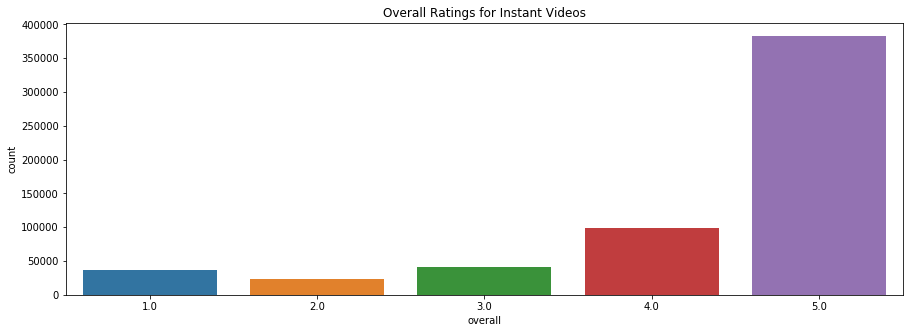


Descriptive Statistics

Overall Ratings:

count    583933.000000
mean          4.316185
std           1.163706
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64

Number of reviews per product:

count    23965.000000
mean        24.366076
std        205.832552
min          1.000000
25%          1.000000
50%          3.000000
75%          8.000000
max      12633.000000
Name: overall, dtype: float64

Number of reviews per reviewer:

count    426922.000000
mean          1.367774
std           1.500764
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         277.000000
Name: overall, dtype: float64

Review length:

count    583933.000000
mean         61.577291
std          92.826554
min           0.000000
25%          26.000000
50%          35.000000
75%          60.000000
max        6177.000000
Name: reviewTextTokens, dtype: float64

Number of revie

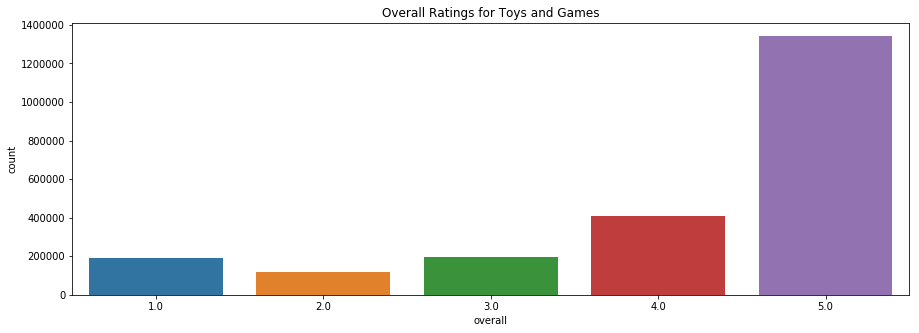


Descriptive Statistics

Overall Ratings:

count    2.252771e+06
mean     4.149873e+00
std      1.279080e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: overall, dtype: float64

Number of reviews per product:

count    327698.000000
mean          6.874534
std          32.716221
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max       10281.000000
Name: overall, dtype: float64

Number of reviews per reviewer:

count    1.342911e+06
mean     1.677528e+00
std      3.025369e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.528000e+03
Name: overall, dtype: float64

No tokenization available for Toys and Games

Number of reviews: 2252771
Number of unique reviewers: 1342911
Number of unique products:  327698





In [42]:
for i, df in enumerate(dfs):    
    
    print('-' * (len(df_names[i]) + 34) )
    print('| ' + 'Exploratory Data Analysis for', df_names[i], '|')
    print('-' * (len(df_names[i]) + 34) )
    
    plt.figure(figsize = (15,5))
    plt.title('Overall Ratings for ' + df_names[i])
    sns.countplot(df.overall)
    plt.show()
    
    print('\nDescriptive Statistics\n')
    
    print('Overall Ratings:\n')
    print(df.overall.describe())
    
    print('\nNumber of reviews per product:\n')
    print(df.groupby(['asin'], as_index = False).agg({'overall':'count'}).overall.describe())
    
    print('\nNumber of reviews per reviewer:\n')
    print(df.groupby(['reviewerID'], as_index = False).agg({'overall':'count'}).overall.describe())

    # Descriptive Statistics only when tokenization exists...
    try:
        df.reviewTextTokens[0]
        print('\nReview length:\n')
        print(df.reviewTextTokens.apply(len).describe())
    except:
        plt.close()
        print('\nNo tokenization available for ' + df_names[i])
    
    print('')
    print('Number of reviews:', len(df))
    print('Number of unique reviewers:', len(df.reviewerID.unique()))
    print('Number of unique products: ', len(df.asin.unique()))

    print('\n\n')